# Birthrate by Day and Date

In this notebook, we’ll explore a freely-available data on births in the USA, provided by the Centers for Disease Control (CDC). You can access the data here: [births.csv](https://github.com/themarisolhernandez/anlt-232-intro-to-data-vis/blob/master/05%20Matplotlib%20Cont/data/birthsClean.csv). This dataset has been widely analyzed, including by [Andrew Gelman](http://andrewgelman.com/) and his group; for example, this [this blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/) delves into the data's intriguing insights.

By visualizing the birth data across different days and dates, we’ll demonstrate the power of data visualization in telling compelling stories. Specifically, we'll investigate trends in birth rates, revealing patterns that might not be immediately obvious without a graphical approach.

Let's start by reading the dataset.

In [50]:
# these are done in my startup file
# import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd

births = pd.read_csv('data/birthsClean.csv')

Taking a look at the data, we see that it’s relatively simple: it contains the number of
births grouped by *date* and *gender*:

In [51]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


Let's determing the range of years for the `births` dataset by finding the minimum and maximum values in the `"year"` column.

In [52]:
start_year = births["year"].min()
end_year = births["year"].max()
print(f"The samples are between the years {start_year}-{end_year}")

The samples are between the years 1969-1988


Let’s also add a **decade column**, and take a look at *male* and *female births* as a function of decade:

In [53]:
births['decade'] = 10 * (births['year'] // 10)  # You do understand this, right?
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


We can start to understand this data a bit more by using a **pivot table**. 

In [54]:
# See: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


We immediately see that male births outnumber female births in every decade.

Let's use the Matplotlib interface to Pandas objects.  

`Series` and `DataFrame.columns` know how to **`plot()`** themselves!

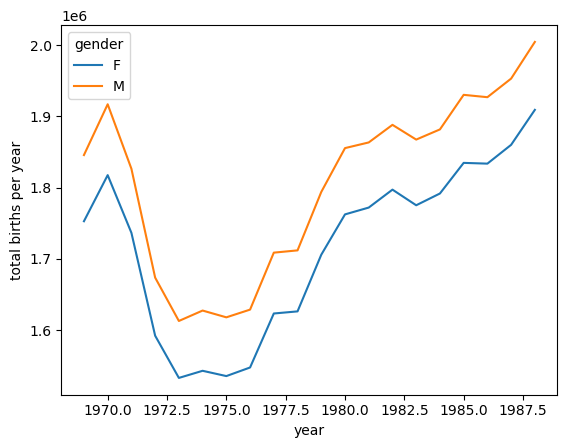

In [55]:
# Plot the total births per year by gender
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

# Add a label on the y-axis
plt.ylabel('total births per year')

# Show the figure
plt.show()

With simple `pivot_table()` and `plot()` methods, we can immediately see the trend in births by gender. By eye, we find that over the past 50 years male births have outnumbered female births by around 5%.

### Further Data Exploration

There are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this
point.

We can combine the *day, month*, and *year* to create a `datetime` index.  This allows us to quickly compute the weekday corresponding to each row.

In [56]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

Using this `datetime` index, we can use `.dayofweek` to get the day of the week from a pandas datetime object.

The `.dayofweek` attribute returns an integer where:
- 0 corresponds to **Monday**
- 1 corresponds to **Tuesday**
- 2 corresponds to **Wednesday**
- 3 corresponds to **Thursday**
- 4 corresponds to **Friday**
- 5 corresponds to **Saturday**
- 6 corresponds to **Sunday**

In [57]:
births['dayofweek'] = births.index.dayofweek

Now let's reinspect our dataframe,

In [58]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


### Births by Weekday

Now let's *group* (collapse) the data down on the *day of the week*

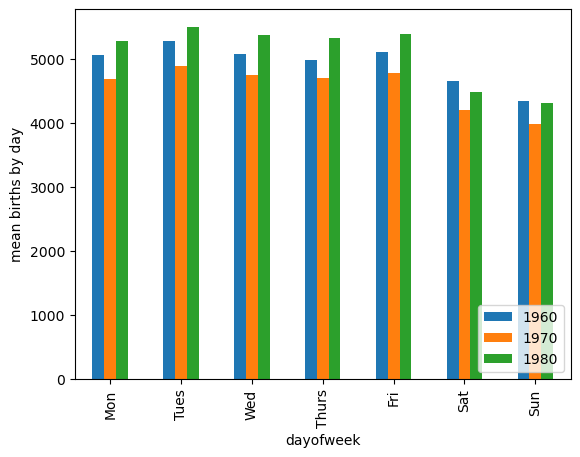

In [59]:
# Plot the mean births per weekday by decade in a bar plot
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot(kind='bar')

# Add x-tick labels
plt.xticks(np.arange(7), ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

# Add a legend
plt.legend(loc='lower right')

# Add a label for the y-axis
plt.ylabel('mean births by day')

# Show the figure
plt.show()

What do you notice? To me, it's clear that **births dropped on the weekends** — interesting!

Note that the 1990s and 2000s are missing because the CDC started reporting only the month of
birth starting in 1989.

Another intersting view is to plot the **mean number of births** by the **day of the year**.

We can do this with a ***List Comprehension*** making a array of `datetime` objects, each representing a day of the year, also being sure to choose a leap year to account for February 29th.

In [60]:
import datetime as dt

# Create an array of datetime objects, each representing a day of the year
# 2012 is chosen because it is a leap year
dates = [dt.datetime(2012, month, day) for (month, day) in zip(births['month'], births['day'])]

We can inspect a few of these datetime objects. Note 2012 was chosen because it is a leap year, but the sample could indicate a day that truly falls between then range 1969-1988.

In [61]:
dates[0:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 2, 0, 0),
 datetime.datetime(2012, 1, 2, 0, 0),
 datetime.datetime(2012, 1, 3, 0, 0)]

We can now group by the data by day of year and plot the results. We’ll additionally
annotate the plot with the location of several US holidays:

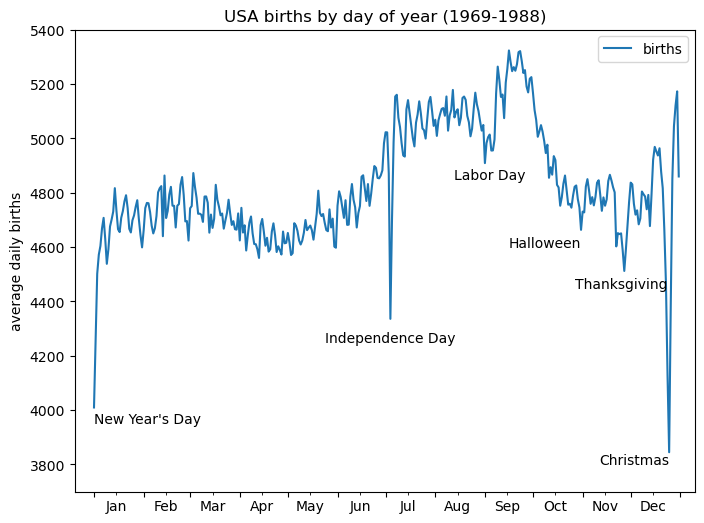

In [62]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the results
births.pivot_table('births', dates).plot(ax=ax)

# Label the plot
ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day", ha='center')
ax.text('2012-9-4', 4850, "Labor Day", ha='center')
ax.text('2012-10-31', 4600, "Halloween", ha='right')
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3800, "Christmas", ha='right')

ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births',
       xlim=('2011-12-20','2013-1-10'),
       ylim=(3700, 5400));

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

plt.show()

The line plot displaying the average daily births in the USA from 1969 to 1988 reveals **noticeable dips in births during major holidays** like New Year's Day, Thanksgiving, and Christmas. 

This pattern suggests external factors could be influencing the number of births on these dates. Possible explanations include short staffing in hospitals, scheduling preferences for elective C-sections, reduced hospital operations during holidays, and cultural or personal reasons for delaying births. 

This example highlights the power of data visualization in storytelling by revealing trends that may not be immediately obvious in raw data, prompting further exploration and critical thinking. It emphasizes how visualizing data can uncover hidden insights and raise questions that lead to deeper understanding.